In [103]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [104]:
df1=pd.read_csv('file:///F:/join/test_Y3wMUE5_7gLdaTN.csv')
df2=pd.read_csv('file:///F:/join/results.csv')

In [105]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [106]:
df2

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [107]:
df1.shape

(367, 12)

In [108]:
df2.shape

(367, 2)

In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [110]:
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [111]:
df1=df1.fillna(0)

In [112]:
df2.info

<bound method DataFrame.info of       Loan_ID  Loan_Status
0    LP001015            1
1    LP001022            1
2    LP001031            1
3    LP001035            1
4    LP001051            1
..        ...          ...
362  LP002971            1
363  LP002975            1
364  LP002980            1
365  LP002986            1
366  LP002989            1

[367 rows x 2 columns]>

In [113]:
df2.isnull().sum()

Loan_ID        0
Loan_Status    0
dtype: int64

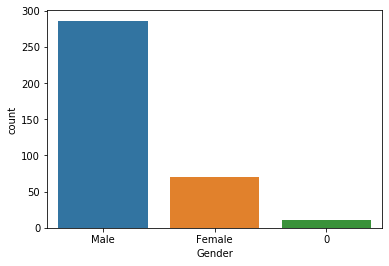

In [114]:
sns.countplot(df1['Gender'])

In [115]:
pd.crosstab(df1.Gender,df2.Loan_Status,margins=True)

Loan_Status,0,1,All
Gender,,,
0,2,9,11
Female,17,53,70
Male,56,230,286
All,75,292,367


In [116]:
df1.Dependents.value_counts()

0     200
2      59
1      58
3+     40
0      10
Name: Dependents, dtype: int64

In [117]:
pd.crosstab(df1.Dependents,df2.Loan_Status,margins=True)

Loan_Status,0,1,All
Dependents,,,
0,1,9,10
0,40,160,200
1,9,49,58
2,14,45,59
3+,11,29,40
All,75,292,367


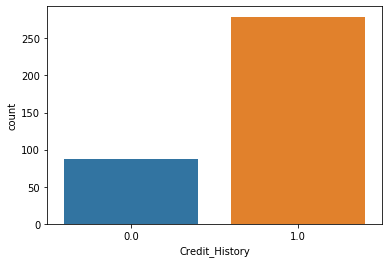

In [118]:
sns.countplot(df1['Credit_History'])

In [119]:
pd.crosstab(df1.Credit_History, df2.Loan_Status, margins = True)

Loan_Status,0,1,All
Credit_History,,,
0.0,60,28,88
1.0,15,264,279
All,75,292,367


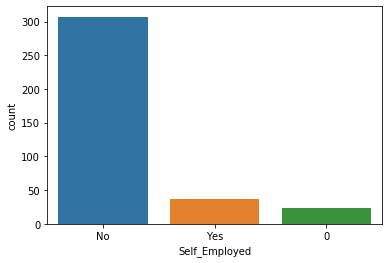

In [120]:
sns.countplot(df1['Self_Employed'])

In [121]:
pd.crosstab(df1.Self_Employed, df2.Loan_Status,margins = True)

Loan_Status,0,1,All
Self_Employed,,,
0,10,13,23
No,61,246,307
Yes,4,33,37
All,75,292,367


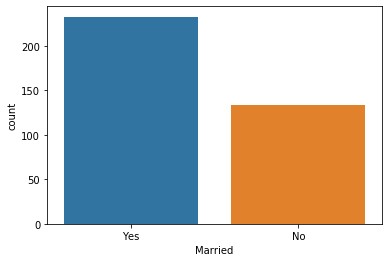

In [122]:
sns.countplot(df1.Married)

In [123]:
pd.crosstab(df1.Married , df2.Loan_Status,margins = True)

Loan_Status,0,1,All
Married,,,
No,33,101,134
Yes,42,191,233
All,75,292,367


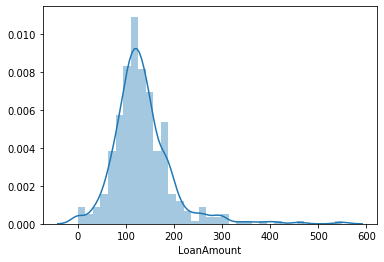

In [124]:
sns.distplot(df1['LoanAmount'])

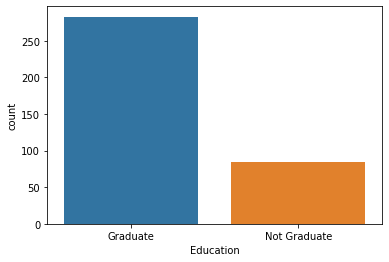

In [125]:
sns.countplot(df1.Education)

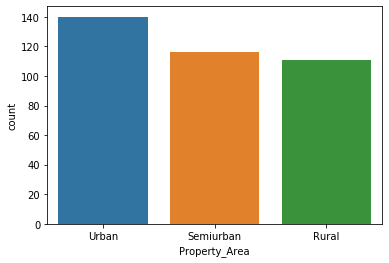

In [126]:
sns.countplot(df1['Property_Area'])

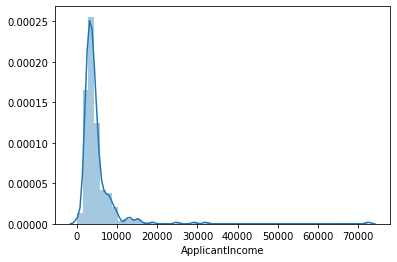

In [127]:
sns.distplot(df1['ApplicantIncome'])

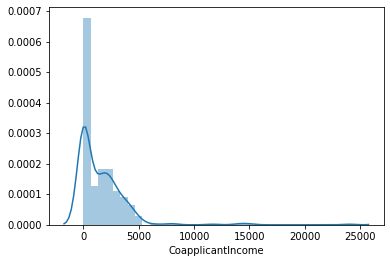

In [128]:
sns.distplot(df1['CoapplicantIncome'])

In [129]:
df1.drop(['Loan_ID'], axis = 1 , inplace =True)

In [130]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [131]:
df2.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


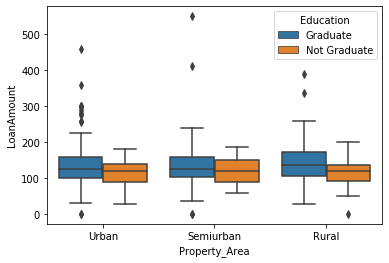

In [132]:
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=df1)

In [133]:
df1.Credit_History.value_counts()

1.0    279
0.0     88
Name: Credit_History, dtype: int64

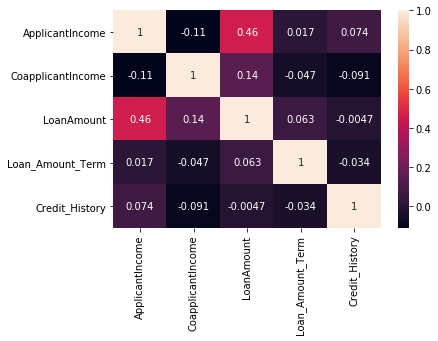

In [134]:
sns.heatmap(df1.corr(),annot=True)

In [135]:
df1.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [136]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


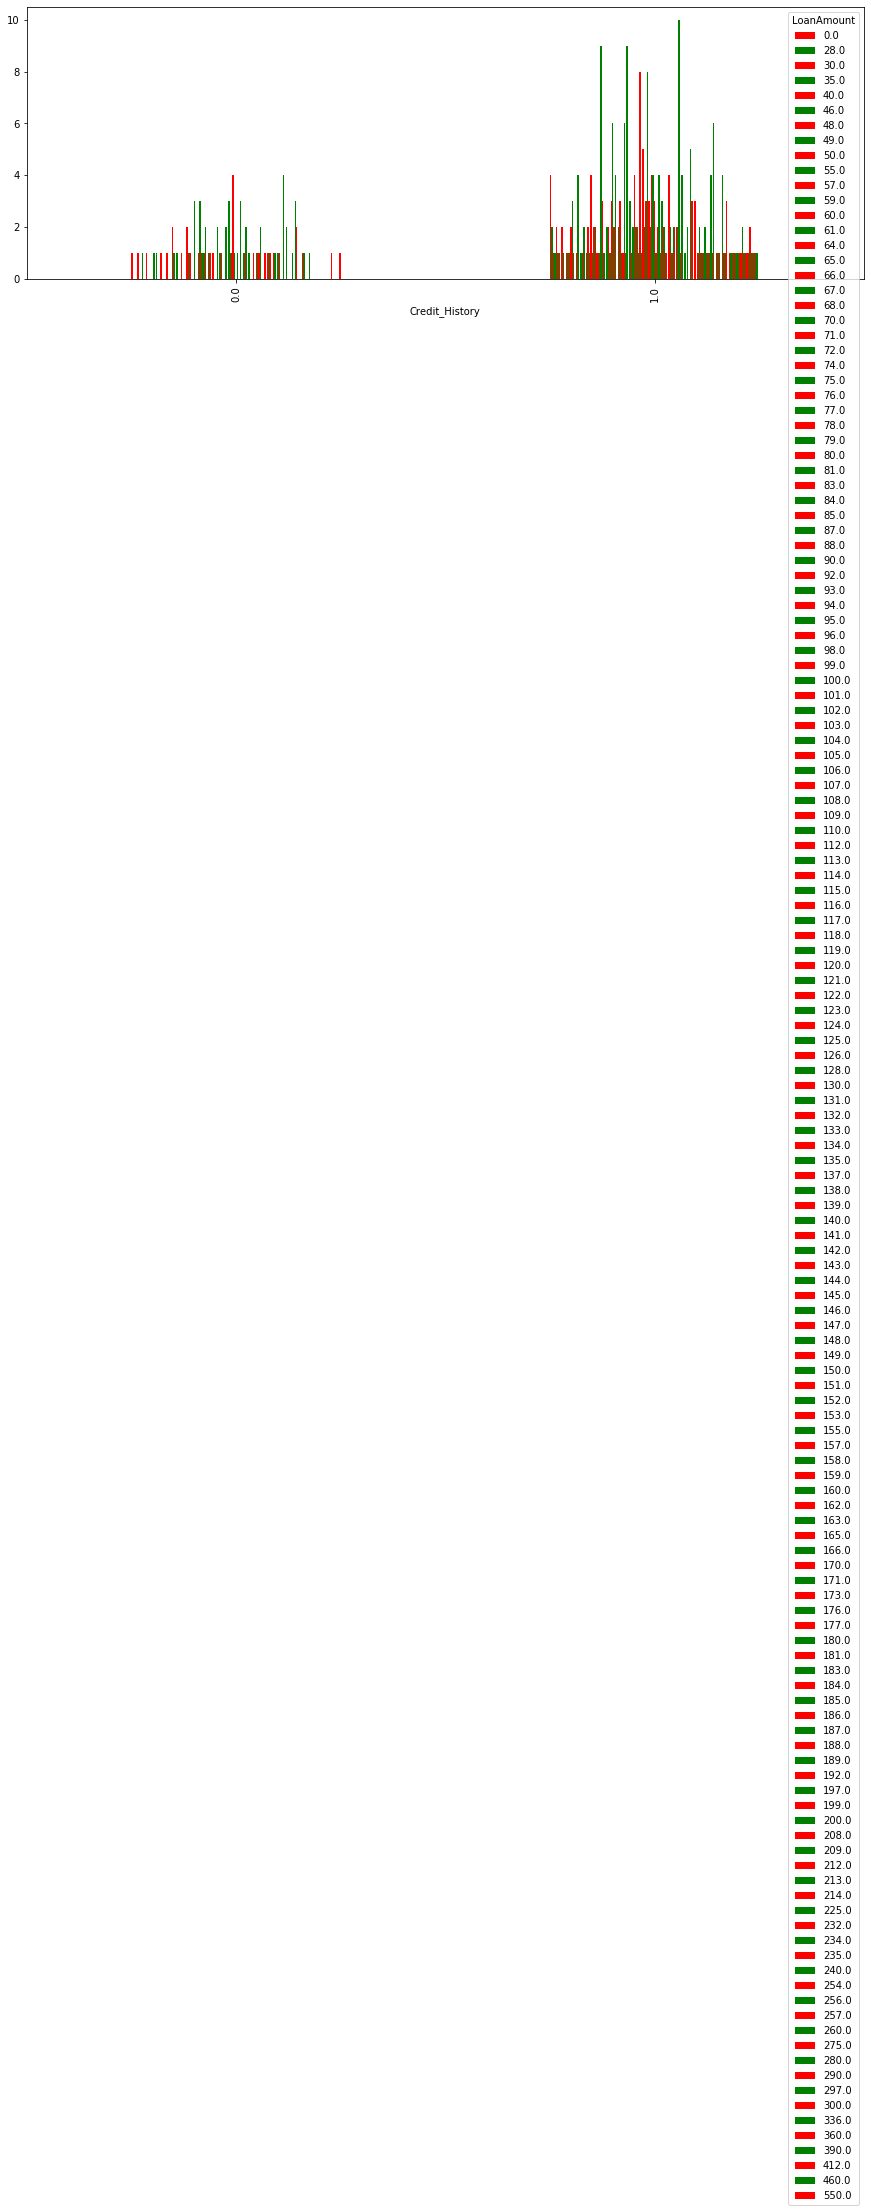

In [137]:
df3=pd.crosstab(df1.Credit_History,df1.LoanAmount).plot(kind='bar',figsize=(15,5),color=('red','green'))


In [138]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [139]:
x=df1.LoanAmount.values
y=df1.Loan_Amount_Term.values

In [140]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [141]:
x=x.reshape(-1,1)

In [142]:
y=y.reshape(-1,1)

In [143]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [144]:
li=LinearRegression()
li.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
li.score(xtest,ytest)

-0.03072028113196068

In [146]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
lo.score(xtest,ytest)

0.8198198198198198

In [148]:
lo.fit(df1[['LoanAmount']],df1.Loan_Amount_Term)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
lo.predict([[110]])

array([360.])

In [150]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [151]:
tre.score(xtest,ytest)

0.7567567567567568

In [152]:
tre.fit(df1[['LoanAmount']],df1.Loan_Amount_Term)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [153]:
tre.predict([[110]])

array([360.])

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [156]:
rfc.score(xtest,ytest)

0.7567567567567568

In [157]:
rfc.fit(df1[['LoanAmount']],df1.Loan_Amount_Term)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [158]:
rfc.predict([[110]])

array([360.])

In [159]:
rfc.fit(df1[['LoanAmount']],df1.Loan_Amount_Term)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [160]:
rfc.predict([[110]])

array([360.])

In [161]:
from sklearn.preprocessing import MinMaxScaler

In [162]:
mns=MinMaxScaler(feature_range=(0,1))
variable=mns.fit_transform(x)

In [163]:
variable

array([[0.2       ],
       [0.22909091],
       [0.37818182],
       [0.18181818],
       [0.14181818],
       [0.27636364],
       [0.10727273],
       [0.26727273],
       [0.50909091],
       [0.22363636],
       [0.16363636],
       [0.29454545],
       [0.07272727],
       [0.30181818],
       [0.22545455],
       [0.23818182],
       [0.36363636],
       [0.22909091],
       [0.54545455],
       [0.18181818],
       [0.08727273],
       [0.05090909],
       [0.18363636],
       [0.22727273],
       [0.52727273],
       [0.26909091],
       [0.25454545],
       [0.5       ],
       [0.10363636],
       [0.22727273],
       [0.13636364],
       [0.34909091],
       [0.27636364],
       [0.28727273],
       [0.18363636],
       [0.32      ],
       [0.33636364],
       [0.16363636],
       [0.21090909],
       [0.25090909],
       [0.18181818],
       [0.2       ],
       [0.16363636],
       [0.36363636],
       [0.15272727],
       [0.33636364],
       [0.29454545],
       [0.196

In [164]:
from sklearn.naive_bayes import MultinomialNB

In [165]:
mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [166]:
mnb.score(xtest,ytest)

0.8198198198198198

In [167]:
from sklearn.naive_bayes import GaussianNB

In [168]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [169]:
gau.score(xtest,ytest)

0.7927927927927928

In [170]:
gau.fit(df1[['LoanAmount']],df1.Loan_Amount_Term)

GaussianNB(priors=None, var_smoothing=1e-09)

In [171]:
gau.predict([[110]])

array([360.])

In [172]:
from sklearn.naive_bayes import BernoulliNB

In [173]:
ber=BernoulliNB()
ber.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [174]:
ber.score(xtest,ytest)

0.8198198198198198

In [175]:
from sklearn.svm import SVC

In [176]:
svc=SVC()
svc.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [177]:
svc.score(xtest,ytest)

0.8198198198198198

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
rdf=RandomForestClassifier()
rdf.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [180]:
rdf.score(xtest,ytest)

0.7657657657657657

In [181]:
df1.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


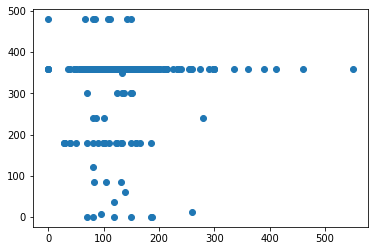

In [182]:
plt.scatter(df1[['LoanAmount']],df1['Loan_Amount_Term'])

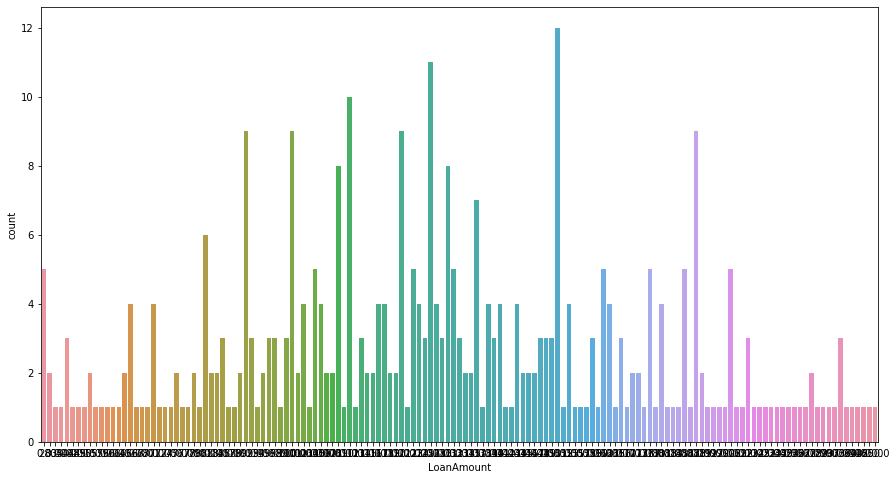

In [183]:
plt.figure(figsize=(15,8))
sns.countplot(df1['LoanAmount'])

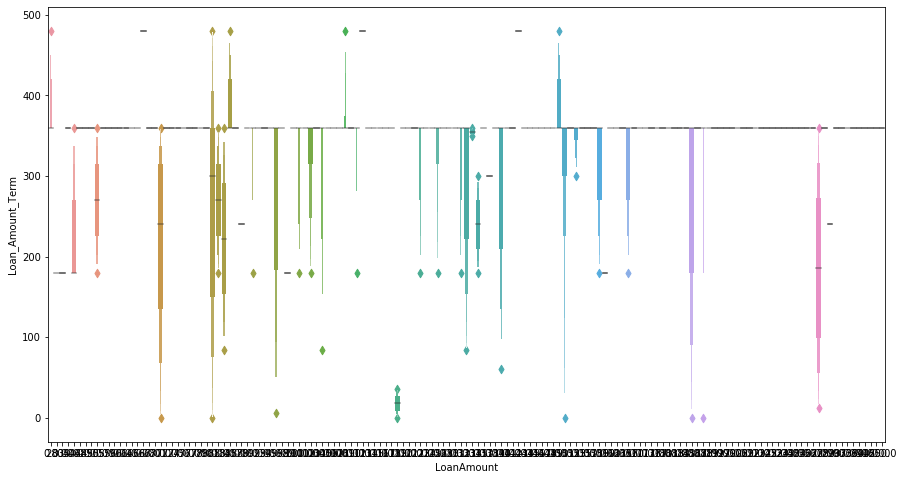

In [184]:
plt.figure(figsize=(15,8))
sns.boxenplot(df1['LoanAmount'],df1['Loan_Amount_Term'])

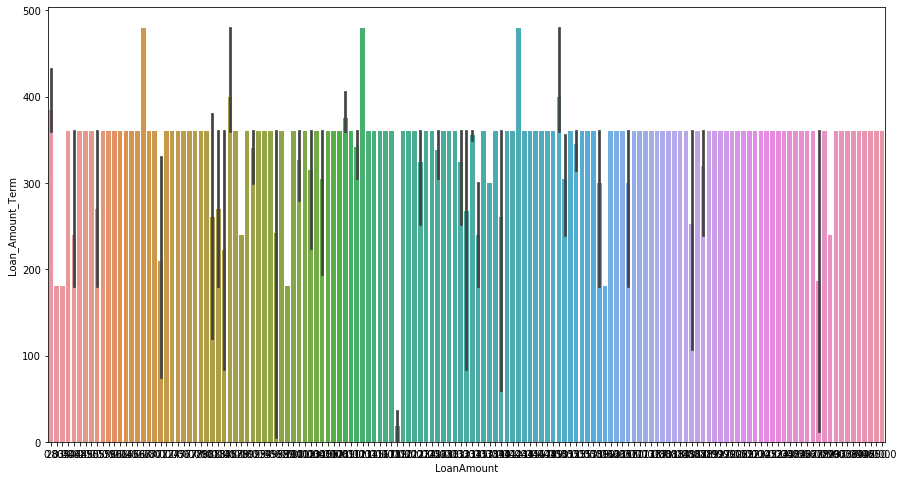

In [185]:
plt.figure(figsize=(15,8))
sns.barplot(df1['LoanAmount'],df1['Loan_Amount_Term'])

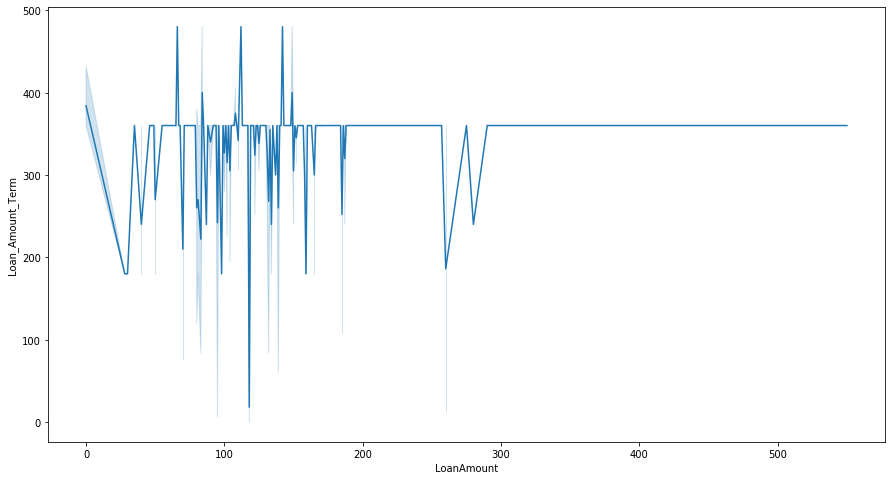

In [186]:
plt.figure(figsize=(15,8))
sns.lineplot(x='LoanAmount',y='Loan_Amount_Term',data=df1)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


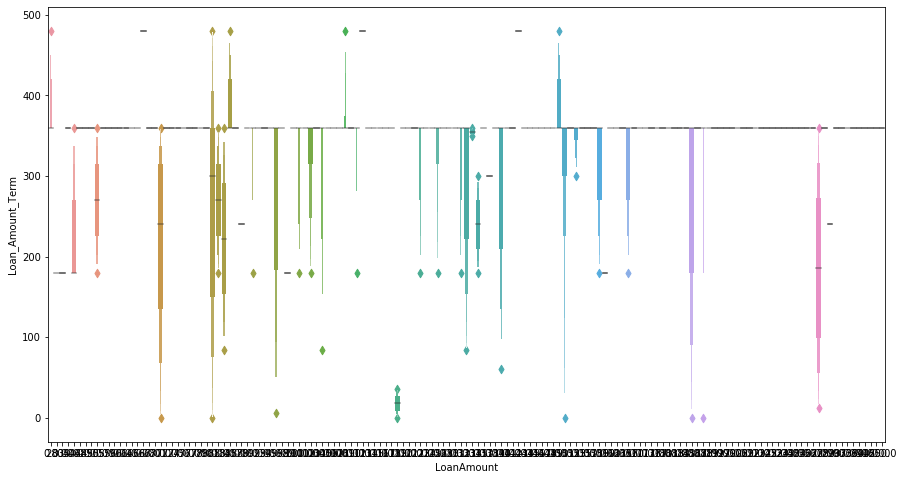

In [187]:
plt.figure(figsize=(15,8))
sns.lvplot(x='LoanAmount',y='Loan_Amount_Term',data=df1)

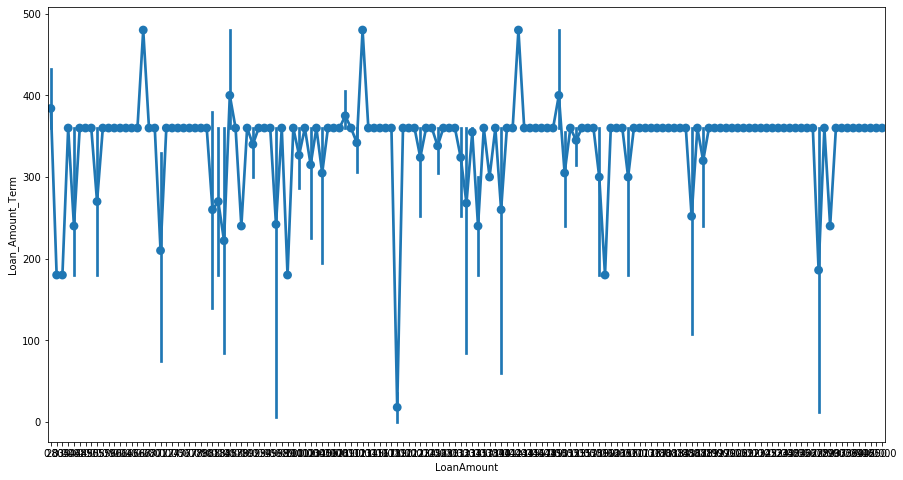

In [188]:
plt.figure(figsize=(15,8))
sns.pointplot(x='LoanAmount',y='Loan_Amount_Term',data=df1)

<Figure size 1080x576 with 0 Axes>

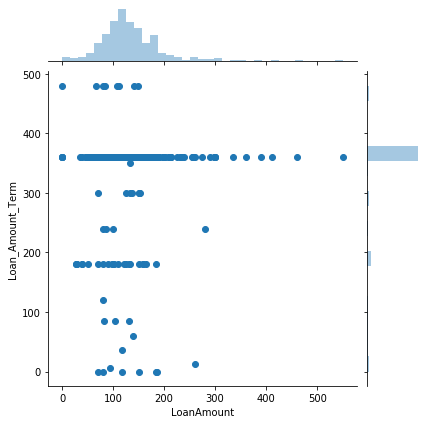

In [189]:
plt.figure(figsize=(15,8))
sns.jointplot(x='LoanAmount',y='Loan_Amount_Term',data=df1)